# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [263]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

In [264]:
import os
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Google Drive
from google.colab import drive

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    RandomForestRegressor,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [265]:
# Mount personal Google drive
root_dir = '/content/drive'
drive.mount(root_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
# Define the sub-directory where the data is located
drive_subdir = 'MyDrive/DataScienceCourse/EnsembleTechniques/Project'

# Define the name of the CSV file containing the dataset
file_name = 'EasyVisa.csv'

# Construct the full path to the datafile
file_path = os.path.join(root_dir, drive_subdir, file_name)

# Load the datafile into a dataframe
data = pd.read_csv(file_path)
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [267]:
# View the first few rows of the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [268]:
# View the last few rows of the dataset
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [269]:
# View a summary of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [270]:
# Get the shape of the DataFrame
num_rows, num_cols = df.shape
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 25480 rows and 12 columns.


In [271]:
# Describe the numeric data
df.describe(include='number')

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [272]:
# Check for any null-values or duplicates
num_nulls = df.isnull().sum().sum()
num_duplicates = df.duplicated().sum()
print(f"The DataFrame has {num_nulls} null values and {num_duplicates} duplicates.")

The DataFrame has 0 null values and 0 duplicates.


In [273]:
# Check for any features containing all unique values
for column in df.columns:
    if df[column].nunique() == num_rows:
        print(f"Column '{column}' contains all unique values.")
        df.drop(column, axis=1, inplace=True)

Column 'case_id' contains all unique values.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [274]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, units=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    if units is None:
      units = ''
    else:
      units = f' ({units})'

    fig, (ax_hist, ax_box) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.7, 0.3)},
        figsize=figsize
        )

    if bins:
      sns.histplot(
          data=data,
          x=feature,
          kde=kde,
          ax=ax_hist,
          bins=bins
          )
    else:
      sns.histplot(
          data=data,
          x=feature,
          kde=kde,
          ax=ax_hist,
          )

    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="yellow")
    ax_hist.grid(True)

    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,
        color='#555555',
        meanprops={
            'marker': (8, 1, 0),
            'markerfacecolor': 'red',
            'markeredgecolor': 'black',
            'markersize': 12,
            },
        medianprops={
            'linewidth': 1.5,
            'color': 'yellow'
            }
        )
    ax_box.set_xlabel(feature + units, fontsize=12)
    ax_box.grid(True)

    fig.suptitle(f"UVA Feature: {feature}", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

In [275]:
def labeled_barplot(data, feature, limit=None):

    col_len = len(data[feature])
    count = data[feature].nunique()
    if limit is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(limit + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    plt.title(f'Feature: {feature}', fontsize=16, fontweight='bold')
    ax = sns.countplot(data=data, x=feature, order=data[feature].value_counts().index[:limit])

    for p in ax.patches:
      label = "{:.1f}%".format(100 * p.get_height() / col_len)  # percentage of each class of the category
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.grid(True)
    plt.show()

In [276]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90, fontsize=15)
    plt.title(f'Feature: {predictor}', fontsize=16, fontweight='bold')
    plt.grid(True)
    plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis

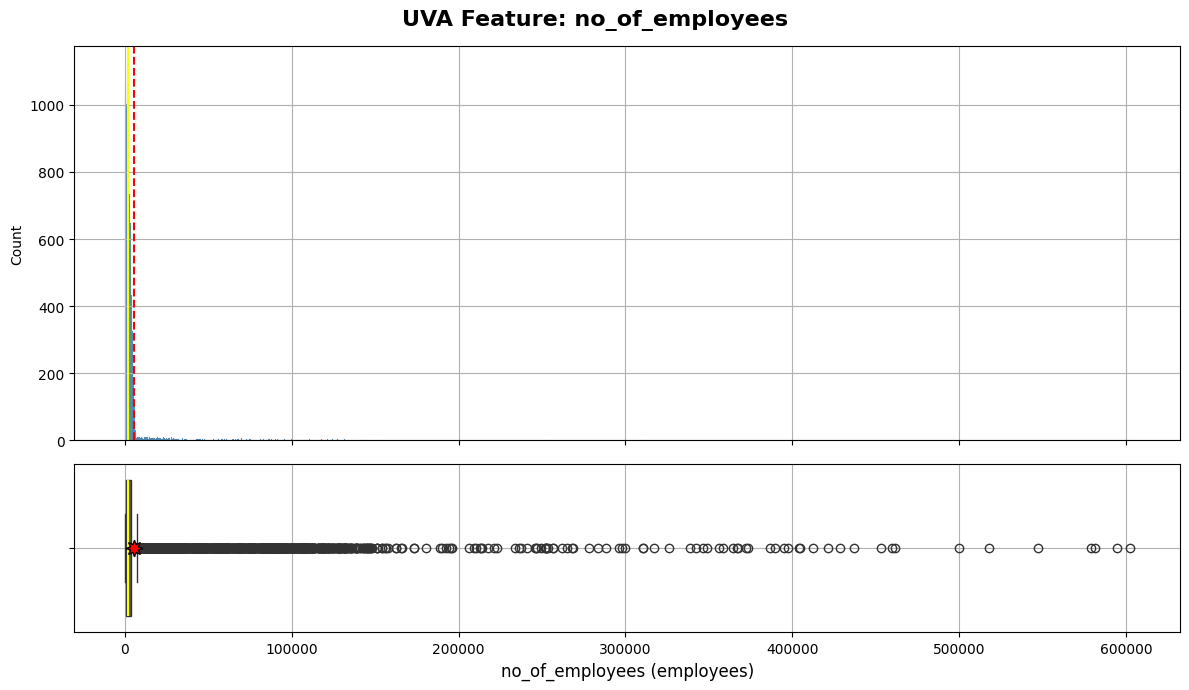

In [277]:
histogram_boxplot(df, 'no_of_employees', units='employees')

In [278]:
df['no_of_employees'].describe()

,no_of_employees
count,25480.000000
mean,5667.043210
std,22877.928848
min,-26.000000
25%,1022.000000
50%,2109.000000
75%,3504.000000
max,602069.000000


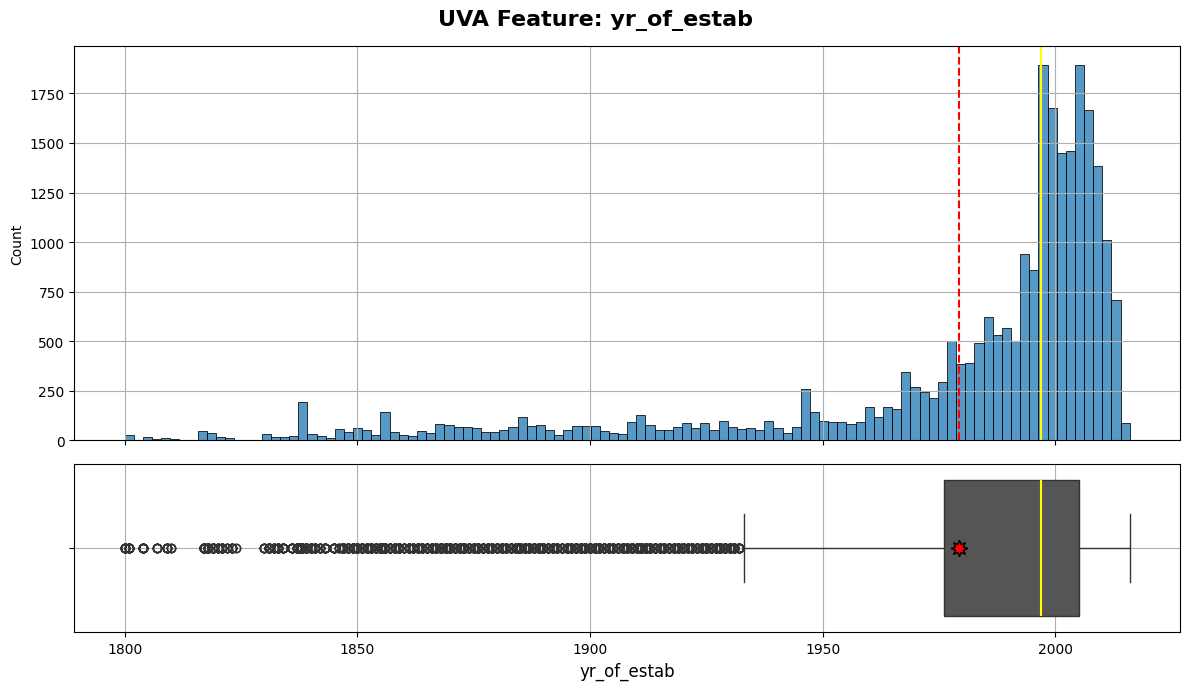

In [279]:
histogram_boxplot(df, 'yr_of_estab')

In [280]:
# Convert yr_of_estab to age_of_estab
BASE_YEAR = 2016
df['age_of_estab'] = BASE_YEAR - df['yr_of_estab']
df.drop('yr_of_estab', axis=1, inplace=True)

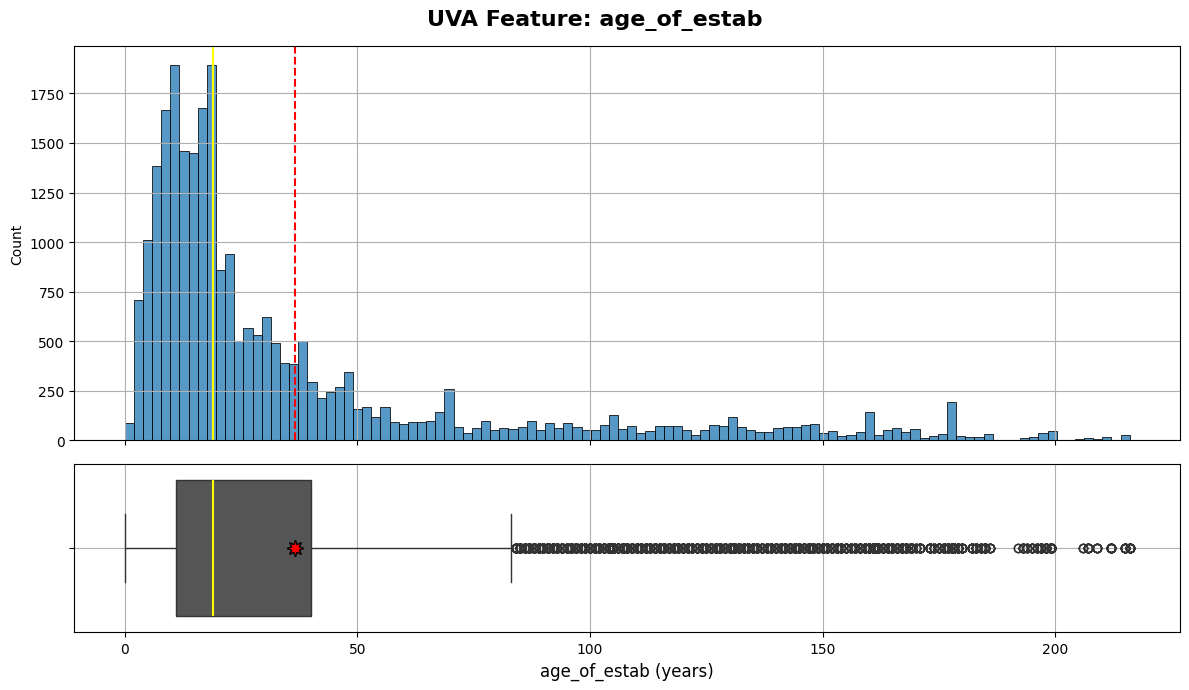

In [281]:
histogram_boxplot(df, 'age_of_estab', units='years')

In [282]:
df['age_of_estab'].describe()

,age_of_estab
count,25480.000000
mean,36.590071
std,42.366929
min,0.000000
25%,11.000000
50%,19.000000
75%,40.000000
max,216.000000


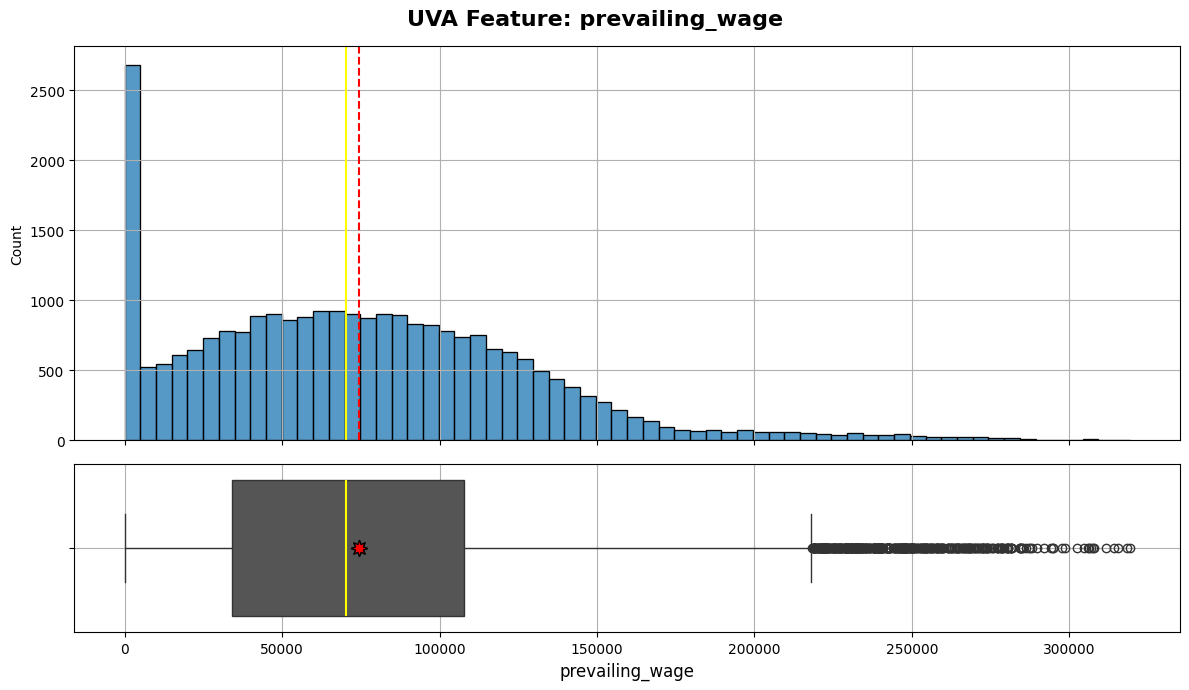

In [283]:
histogram_boxplot(df, 'prevailing_wage')

This doesn't look right. Let's figure out what's going on...

In [284]:
# Investigate wage units
df['unit_of_wage'].value_counts()

,unit_of_wage
Year,22962
Hour,2157
Week,272
Month,89


We need to create a sigular feature with constant units

In [285]:
HOURS_PER_WEEK = 40
WEEKS_PER_MONTH = 4
MONTHS_PER_YEAR = 12

def convert_to_hourly(row):
    if row['unit_of_wage'] == 'Week':
        hourly_wage = row['prevailing_wage'] / HOURS_PER_WEEK
    elif row['unit_of_wage'] == 'Month':
        hourly_wage = row['prevailing_wage'] / (HOURS_PER_WEEK * WEEKS_PER_MONTH)
    elif row['unit_of_wage'] == 'Year':
        hourly_wage = row['prevailing_wage'] / (HOURS_PER_WEEK * WEEKS_PER_MONTH * MONTHS_PER_YEAR)
    else:
        hourly_wage = row['prevailing_wage']
    return hourly_wage

df['hourly_wage'] = df.apply(convert_to_hourly, axis=1)
df.drop('prevailing_wage', axis=1, inplace=True)

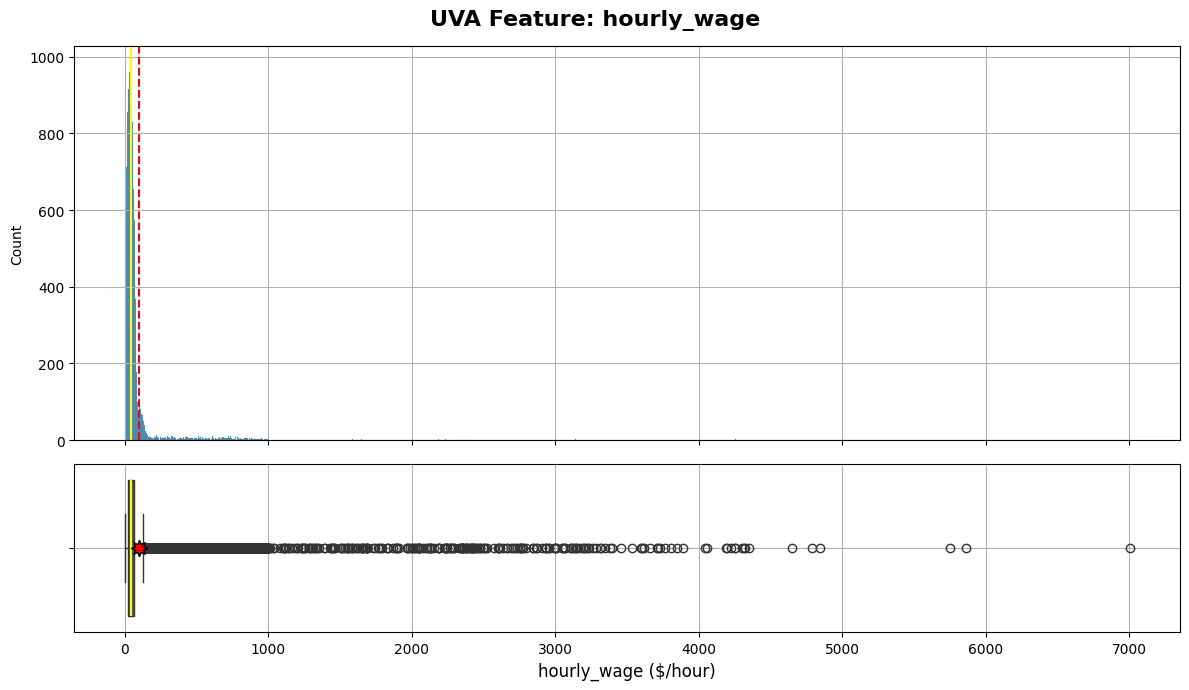

In [286]:
histogram_boxplot(df, 'hourly_wage', units='$/hour')

In [287]:
df['hourly_wage'].describe()

,hourly_wage
count,25480.000000
mean,97.979417
std,278.097824
min,0.052083
25%,24.527495
50%,43.125839
75%,64.991286
max,7004.398750


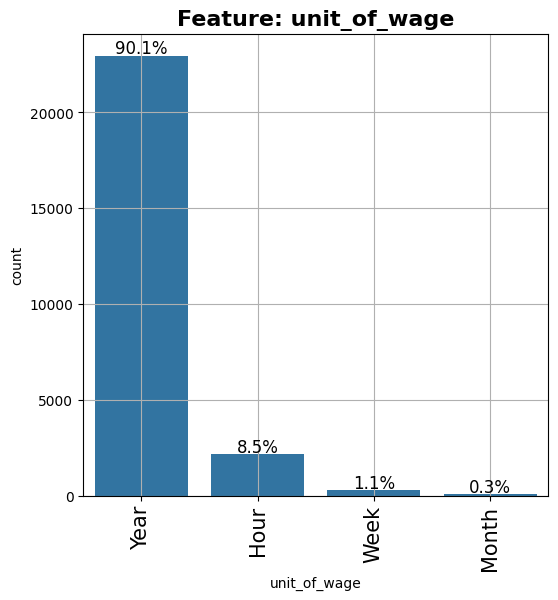

In [288]:
labeled_barplot(df, 'unit_of_wage')

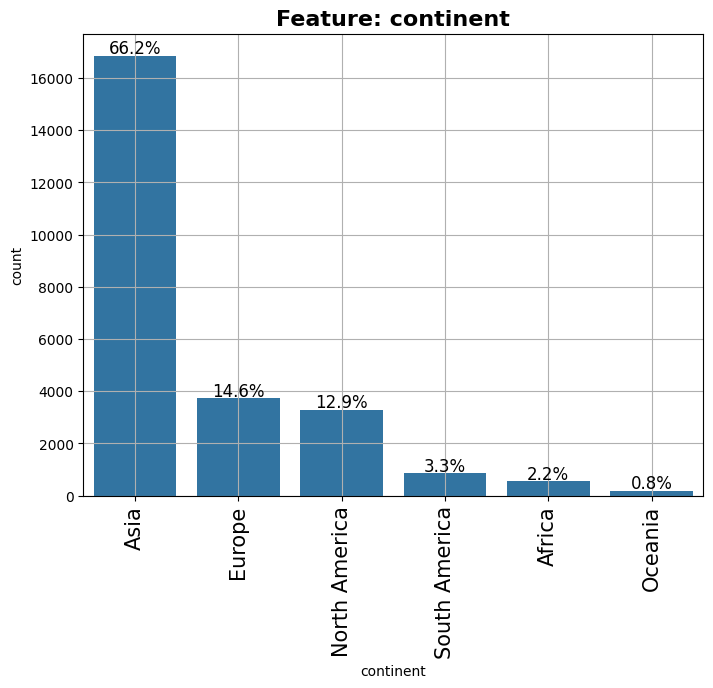

In [289]:
labeled_barplot(df, 'continent')

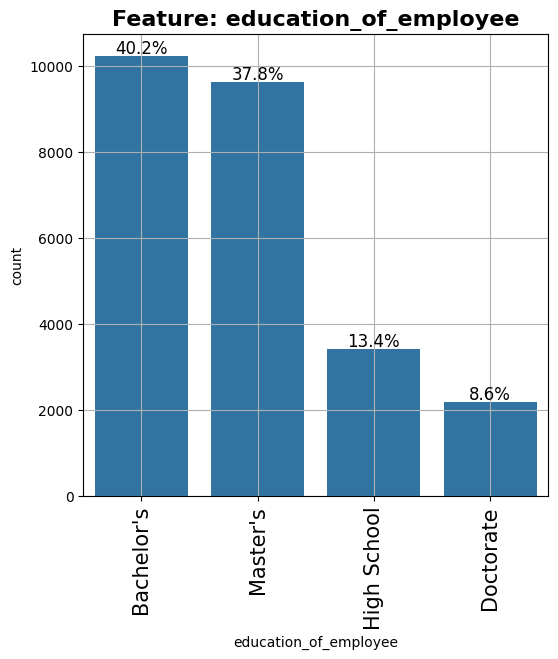

In [290]:
labeled_barplot(df, 'education_of_employee')

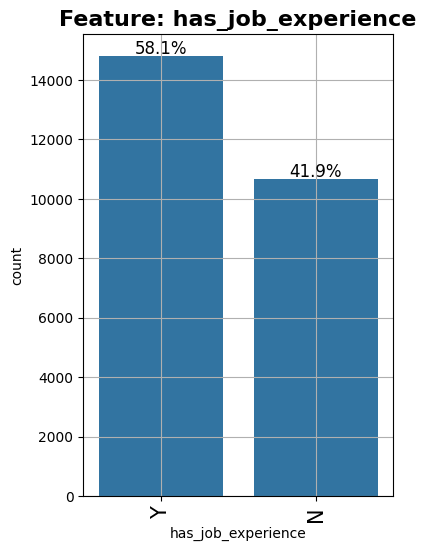

In [291]:
labeled_barplot(df, 'has_job_experience')

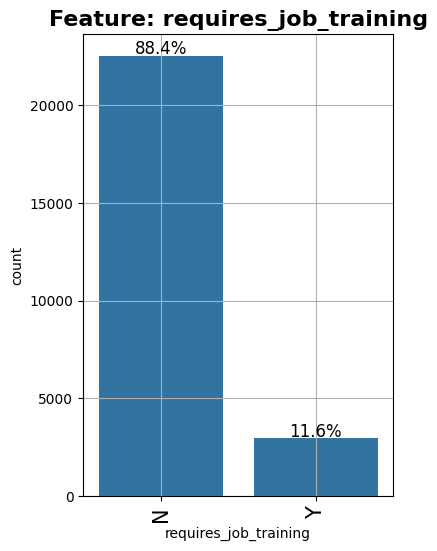

In [292]:
labeled_barplot(df, 'requires_job_training')

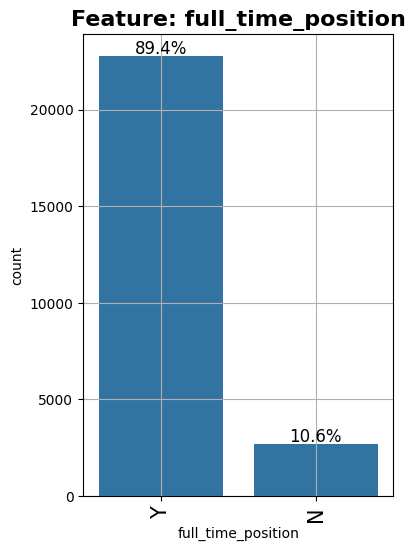

In [293]:
labeled_barplot(df, 'full_time_position')

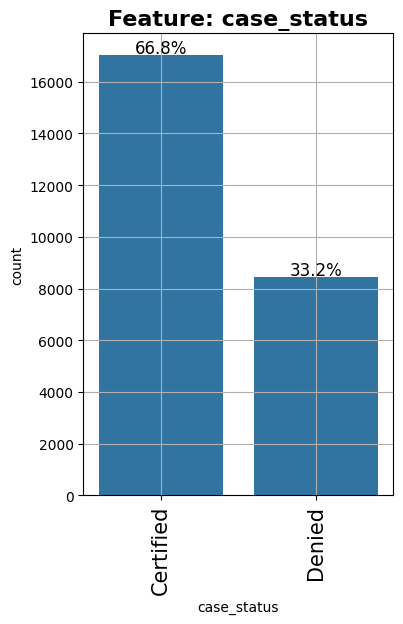

In [294]:
labeled_barplot(df, 'case_status')

### Bivariate Analysis

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


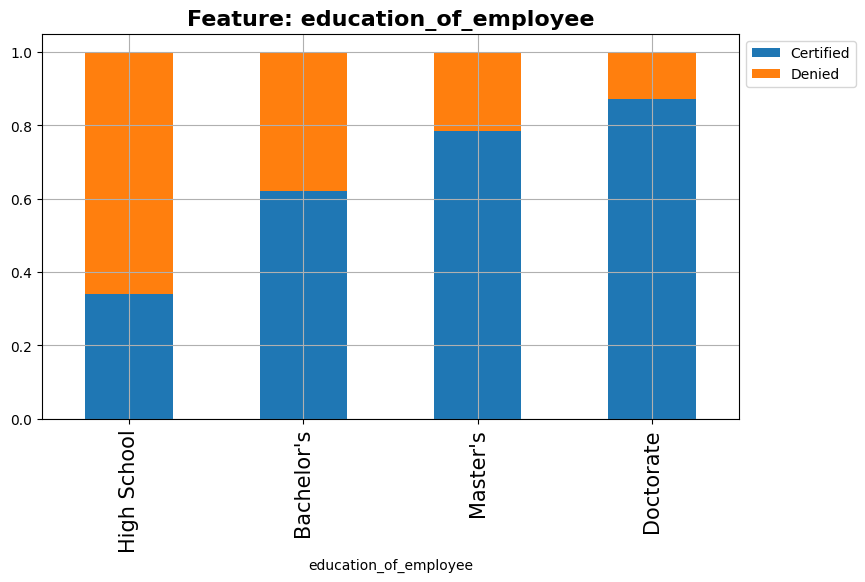

In [295]:
# Question 1: Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
stacked_barplot(df, 'education_of_employee', 'case_status')

Higher levels of education tend to correlate with an increased chance of visa certification.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


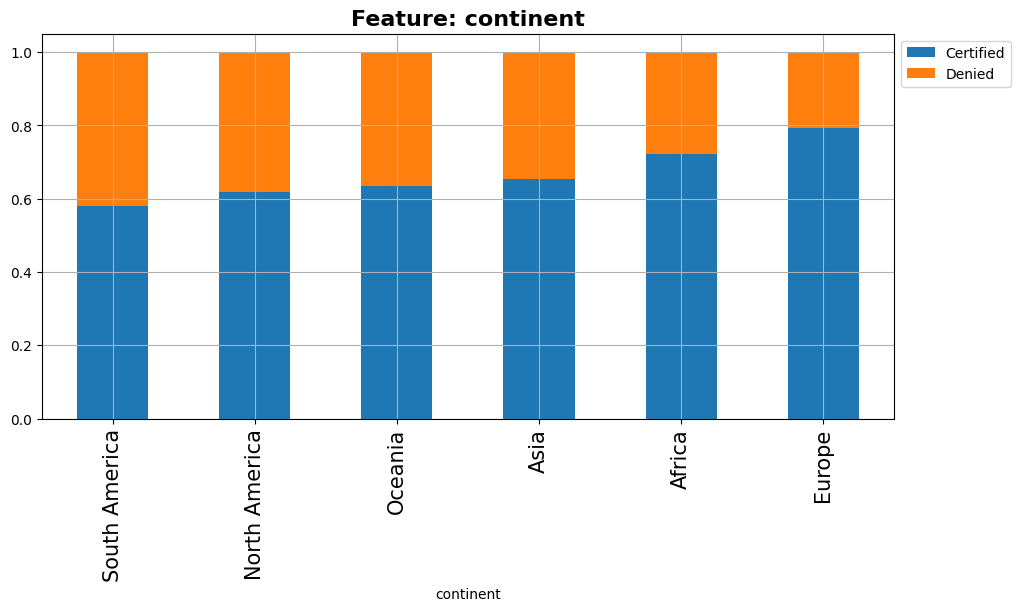

In [296]:
# Question 2: How does the visa status vary across different continents?
stacked_barplot(df, 'continent', 'case_status')

Europeans have the greatest certification rate while South Americans have the lowest certification rate.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


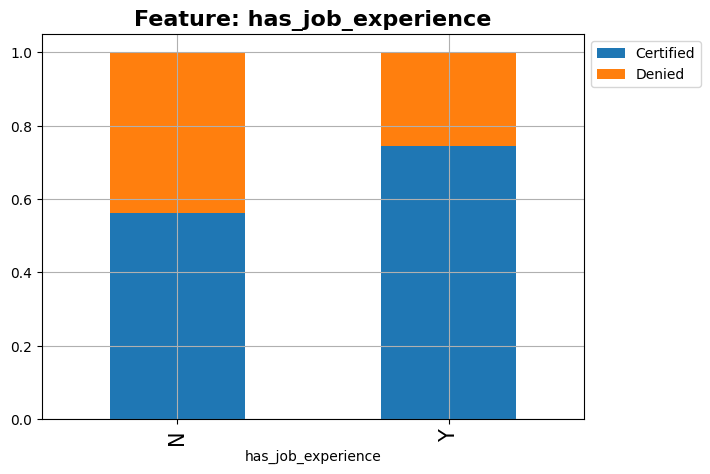

In [297]:
# Question 3: Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
stacked_barplot(df, 'has_job_experience', 'case_status')

Employees with more job experience have a higher chance of being approved for a visa.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


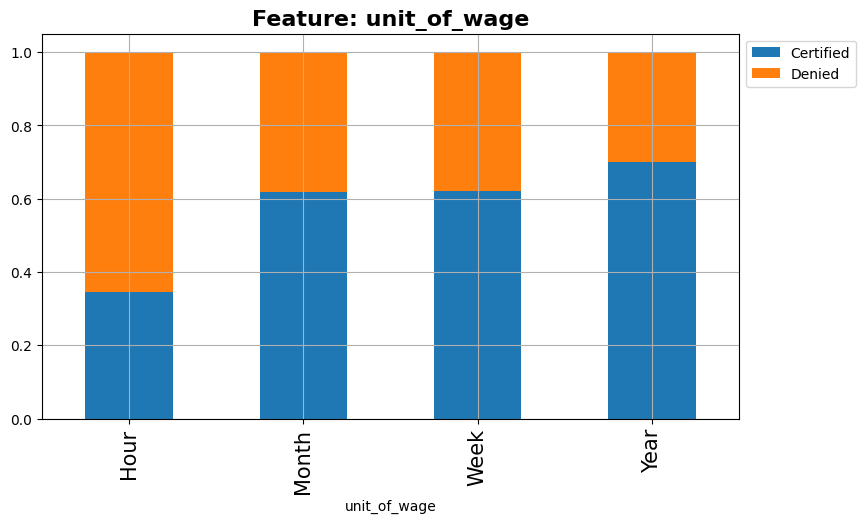

In [298]:
# Question 4: In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
stacked_barplot(data, 'unit_of_wage', 'case_status')

Employees who are paid a yearly salary have the highest certification rate. Hourly workers have the lowest certification rate.

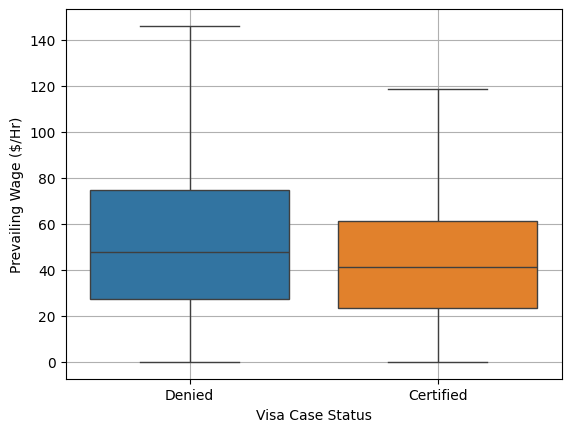

In [299]:
# Question 5: The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
sns.boxplot(data=df, x='case_status', y='hourly_wage', hue='case_status', showfliers=False)
plt.xlabel('Visa Case Status')
plt.ylabel('Prevailing Wage ($/Hr)')
plt.grid(True)
plt.show()

Interestingly, when we ignore the outliers, workers who are certified for a visa tend to have a slightly _lower_ hourly wage than those who are not certified.

In [300]:
# Replace Y/N columns with integer representations
yn_cols = ['has_job_experience', 'requires_job_training', 'full_time_position']
df[yn_cols] = df[yn_cols].replace({'Y': 1, 'N': 0})

In [301]:
# Convert case_status to integer feature
df['case_status'] = df['case_status'].replace({'Certified': 1, 'Denied': 0})

In [302]:
# Convert object feature types to Categorical types
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  int64   
 3   requires_job_training  25480 non-null  int64   
 4   no_of_employees        25480 non-null  int64   
 5   region_of_employment   25480 non-null  category
 6   unit_of_wage           25480 non-null  category
 7   full_time_position     25480 non-null  int64   
 8   case_status            25480 non-null  int64   
 9   age_of_estab           25480 non-null  int64   
 10  hourly_wage            25480 non-null  float64 
dtypes: category(4), float64(1), int64(6)
memory usage: 1.5 MB


In [303]:
# Inspect the contents of all categorical features
categorical_columns = df.select_dtypes(include=['category']).columns
print("----------------------------")
print("Categorical Column Summaries")
print("----------------------------")
categorical_feature_names = []
for i, categorical_column in enumerate(categorical_columns, start=1):
    categorical_feature_names.append(categorical_column)
    print(f"\n({i}) {categorical_column.upper()}:")
    print(df[categorical_column].value_counts())

----------------------------
Categorical Column Summaries
----------------------------

(1) CONTINENT:
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

(2) EDUCATION_OF_EMPLOYEE:
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

(3) REGION_OF_EMPLOYMENT:
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

(4) UNIT_OF_WAGE:
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64


In [304]:
# Convert categorical features to numeric
replace_struct = {
    "education_of_employee": {
        "High School": 1,
        "Bachelor's": 2,
        "Master's": 3,
        "Doctorate": 4,
    },
}
df.replace(replace_struct, inplace=True)
df = pd.get_dummies(df, columns=['continent', 'region_of_employment', 'unit_of_wage'])
df.head(10)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,full_time_position,case_status,age_of_estab,hourly_wage,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,1,0,0,14513,1,0,9,592.202900,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,3,1,0,2412,1,1,14,43.450859,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2,0,1,44444,1,0,8,64.060865,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2,0,0,98,1,0,119,43.455224,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,3,1,0,1082,1,1,11,78.076766,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,3,1,0,2339,1,1,4,40.756323,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
6,2,0,0,4985,1,1,22,27.935099,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
7,2,1,0,3035,1,0,92,418.229800,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
8,2,0,0,4810,1,1,4,38.730307,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
9,4,1,0,2251,1,1,21,35.163937,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


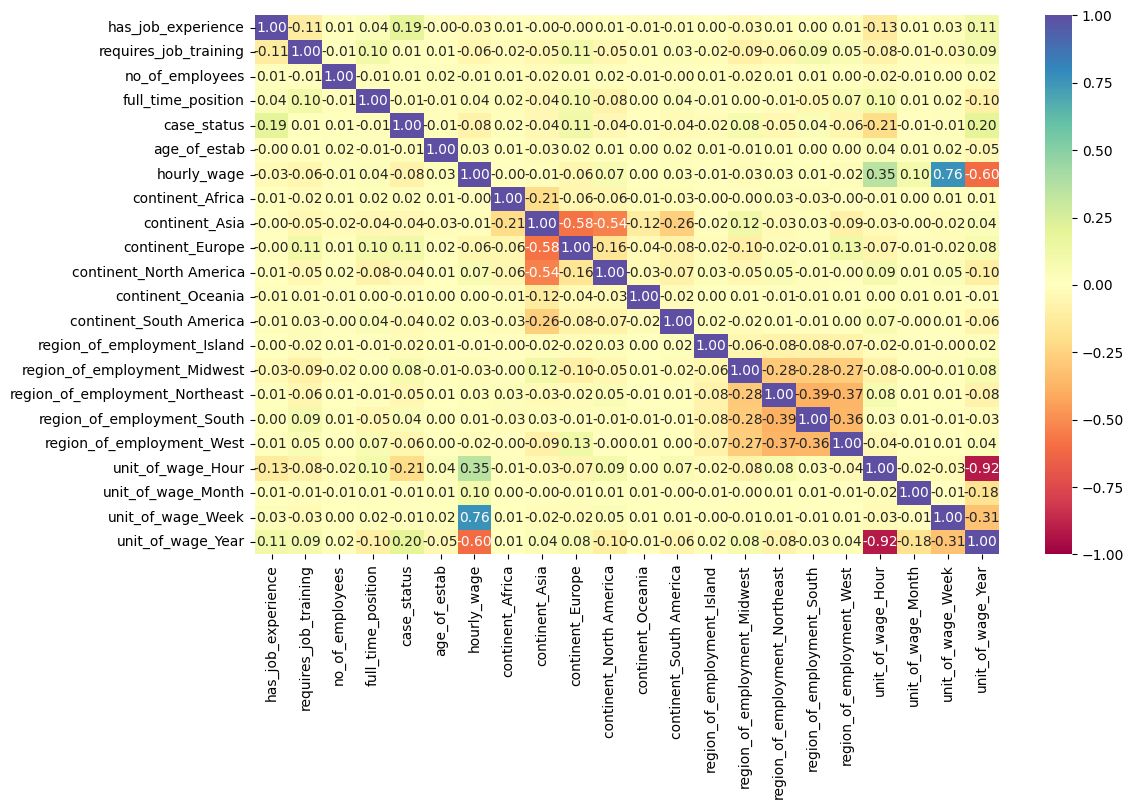

In [305]:
# General Heatmap
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [306]:
# Separating features and the target column
X = df.drop('case_status', axis=1)
y = df['case_status']

In [307]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [308]:
#  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))

    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True:
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

    # returning the list with train and test scores
    return score_list

In [309]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

## Building bagging and boosting models

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Bagging Model: Random Forest

In [310]:
# Creating a Random Forest Bagging Model
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [311]:
# Measuring the performance on the training set
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train, y_train)
print(f"Training performance:\n{rf_estimator_model_train_perf}")

Training performance:
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.161187  0.127042   0.883615        0.883471   inf


In [312]:
# Measuring the performance on the testing set
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test, y_test)
print(f"Testing performance:\n{rf_estimator_model_test_perf}")

Testing performance:
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.428771  0.341245    0.15801        0.155579   inf


Model performs appears overfit on the training set, but underfit on the testing set. Let's use hyperparameter tuning to improve the performance.

In [313]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 75, 50],
    "min_samples_leaf": np.arange(2, 4),
    "max_features": ['log2', 'sqrt'],
    "max_samples": np.arange(0.1, 0.4, 0.1)
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', max_samples=0.2, min_samples_leaf=3,
                      random_state=1)

In [314]:
# measuring the training performance
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print(f"Training performance:\n{rf_tuned_model_train_perf}")

Training performance:
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.392906  0.335433   0.308462        0.307608   inf


In [315]:
# measuring the testing performance
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print(f"Testing performance:\n{rf_tuned_model_test_perf}")

Testing performance:
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.415989  0.353705   0.207462        0.205174   inf


The model doesn't appear to perform very well, but the scores of the testing and training sets are much closer together, which indicates that the model is not suffering from overfitting or underfitting.

### Boosting Model: XGBoost

In [316]:
# Creating an XGB estimator model
xgb_estimator = XGBRegressor(random_state=1, verbosity=0)
xgb_estimator.fit(X_train.astype(float), y_train.astype(float))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [317]:
# Measuring the training performance
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print(f"Training performance:\n{xgb_estimator_model_train_perf}")

Training performance:
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.457028  0.375255   0.064328        0.063172   inf


In [318]:
# measuring the testing performance
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test, y_test)
print(f"Testing performance:\n{xgb_estimator_model_test_perf}")

Testing performance:
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.525623  0.445755  -0.265334       -0.268987   inf


Let's try hyperparameter tuning...

In [319]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1, verbosity=0)

# Grid of parameters to choose from
parameters = {
    'n_estimators': np.arange(50, 110, 25),
    'scale_pos_weight': [1, 2, 5],
    'learning_rate': [0.01, 0.05, 0.07,],
    'gamma': [1, 3],
    'subsample': [0.7, 0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train.astype(float), y_train.astype(float))

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train.astype(float), y_train.astype(float))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [320]:
# measuring the training performance
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train.astype(float), y_train.astype(float))
print(f"Training performance:\n{xgb_tuned_model_train_perf}")

Training performance:
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.407635  0.344028   0.255641        0.254722   inf


In [321]:
# measuring the testing performance
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test.astype(float), y_test.astype(float))
print(f"Testing performance:\n{xgb_tuned_model_test_perf}")

Testing performance:
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.413073  0.347328   0.218534        0.216278   inf


## Model Performance Comparison and Conclusions

In [322]:
# importance of features
print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
education_of_employee           0.227711
has_job_experience              0.124041
unit_of_wage_Hour               0.107203
unit_of_wage_Year               0.092861
continent_Europe                0.058797
region_of_employment_South      0.039493
region_of_employment_Midwest    0.036469
region_of_employment_West       0.032637
region_of_employment_Northeast  0.031743
continent_North America         0.027313
full_time_position              0.026913
continent_Asia                  0.021274
unit_of_wage_Week               0.020412
requires_job_training           0.019745
continent_Oceania               0.019010
continent_South America         0.017775
continent_Africa                0.017139
hourly_wage                     0.016778
region_of_employment_Island     0.016672
no_of_employees                 0.015712
age_of_estab                    0.015194
unit_of_wage_Month              0.015106


In [323]:
# training performance comparison
models_train_comp_df = pd.concat(
      [
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        xgb_estimator_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        ],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGB",
    "XGB Tuned",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGB,XGB Tuned
RMSE,0.161187,0.392906,0.457028,0.407635
MAE,0.127042,0.335433,0.375255,0.344028
R-squared,0.883615,0.308462,0.064328,0.255641
Adj. R-squared,0.883471,0.307608,0.063172,0.254722
MAPE,inf,inf,inf,inf


In [324]:
# testing performance comparison
models_test_comp_df = pd.concat(
      [
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        xgb_estimator_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        ],
    axis=1,
)

models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGB",
    "XGB Tuned",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGB,XGB Tuned
RMSE,0.428771,0.415989,0.525623,0.413073
MAE,0.341245,0.353705,0.445755,0.347328
R-squared,0.158010,0.207462,-0.265334,0.218534
Adj. R-squared,0.155579,0.205174,-0.268987,0.216278
MAPE,inf,inf,inf,inf


Both of the tuned models significantly outperformed the un-tuned models. The tuned-XGB model had the best agreement between test and training sets.

## Actionable Insights and Recommendations

*   Education plays the largest role in determining visa acceptance. I would recommend candidates who are able to persue advanced degrees to do so as it will put them at a major advantage over the competition
*   Job experience is the next most important factor is determining visa acceptance. Candidates with significant job experience are less of a risk to potential employers and thus more likely to be approved for a work visa
*   The pay-interval of the work is also fairly important in determining visa acceptance. Salaried pay is more likely to result in visa acceptance than hourly pay.

